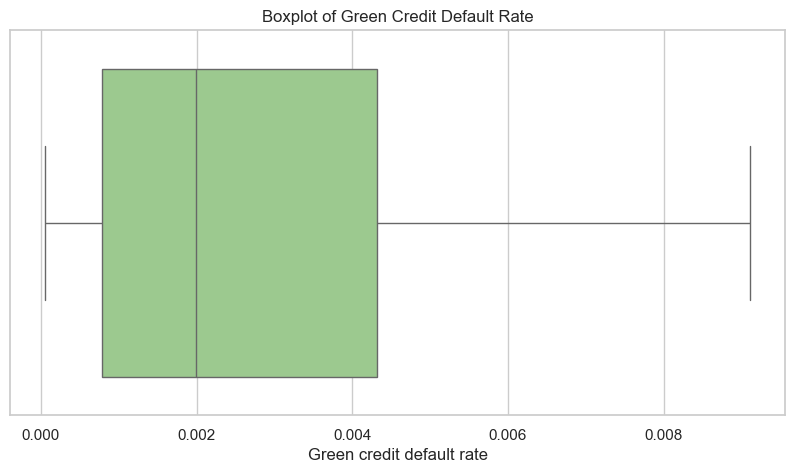

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("GreenLoan_cleaned.xlsx")

# ‰ΩøÁî®ÁÆ±Á∫øÂõæÊü•ÁúãÂºÇÂ∏∏ÂÄº
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Green credit default rate"], color="#96D385")
plt.title("Boxplot of Green Credit Default Rate")
plt.show()

In [83]:
import numpy as np 

# ËÆ°ÁÆóQ1Ôºà25%ÂàÜ‰ΩçÊï∞ÔºâÂíåQ3Ôºà75%ÂàÜ‰ΩçÊï∞Ôºâ
Q1 = df["Green credit default rate"].quantile(0.25)
Q3 = df["Green credit default rate"].quantile(0.75)

# ËÆ°ÁÆóIQRÔºàÂõõÂàÜ‰ΩçË∑ùÔºâ
IQR = Q3 - Q1

# ËÆ°ÁÆó‰∏ä‰∏ãËæπÁïå
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ËØÜÂà´ÂºÇÂ∏∏ÂÄº
outliers = df[(df["Green credit default rate"] < lower_bound) | (df["Green credit default rate"] > upper_bound)]
print(f"Outliers: {len(outliers)}")
print(outliers)

Outliers: 0
Empty DataFrame
Columns: [Code, Year, Industry, Proportion of green credit loans, Proportion of interest expenses on green credit loans, Green credit default rate, Restricted industry for green credit, ESG score, Debt-to-asset ratio, ROA, Interest Expenses to Cash Flow Ratio, Cash to Total Assets, ROE, Current Ratio, Quick Ratio, Operating Cash Flow Ratio, mortgage, ST loan, Value book ratio, Inventory turnover ratio, Log(assets), province, District code, green patent applications, green inventions,  utility model green patent applications, green patents granted, green invention patents authorized]
Index: []

[0 rows x 28 columns]


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=206, reg_alpha=1, reg_lambda=0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=206, reg_alpha=1, reg_lambda=0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=206, reg_alpha=1, reg_lambda=0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=260, reg_alpha=1, reg_lambda=0.01, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=430, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=430, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.2s
[CV] END c

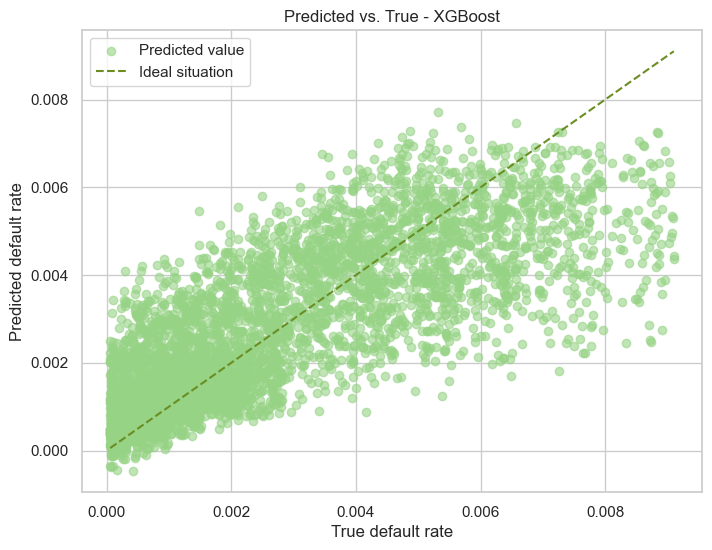

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr, randint

# 1Ô∏è‚É£ ËØªÂèñÊï∞ÊçÆ
file_path = "greenloan_cleaned.xlsx"  # ÊõøÊç¢‰∏∫‰Ω†ÁöÑÊï∞ÊçÆÊñá‰ª∂Ë∑ØÂæÑ
df = pd.read_excel(file_path)

# 2Ô∏è‚É£ Â§ÑÁêÜÂºÇÂ∏∏ÂÄº
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# 3Ô∏è‚É£ Â§ÑÁêÜÁ±ªÂà´ÂèòÈáèÔºà‰ªÖËΩ¨Êç¢ 'Industry'Ôºâ
categorical_cols = ["Industry", "province"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
# 4Ô∏è‚É£ ÈÄâÊã©ÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = df.drop(columns=["Code", "Year", "Green credit default rate"])  # ÁâπÂæÅ
y = df["Green credit default rate"]  # ÁõÆÊ†áÂèòÈáè

# 5Ô∏è‚É£ Ê†áÂáÜÂåñÁâπÂæÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6Ô∏è‚É£ Êï∞ÊçÆÈõÜÊãÜÂàÜ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7Ô∏è‚É£ ÂÆö‰πâ XGBoost Ë∂ÖÂèÇÊï∞ÊêúÁ¥¢ËåÉÂõ¥
param_dist = {
    'n_estimators': randint(100, 1000),  # Ê†ëÁöÑÊï∞Èáè
    'max_depth': [3, 5, 7, 10],  # Ê†ëÁöÑÊ∑±Â∫¶
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Â≠¶‰π†Áéá
    'subsample': [0.6, 0.8, 1.0],  # ÈááÊ†∑ÊØî‰æã
    'colsample_bytree': [0.6, 0.8, 1.0],  # ÊØèÊ£µÊ†ëÁöÑÁâπÂæÅÈááÊ†∑ÊØî‰æã
    'gamma': [0, 0.1, 0.2, 0.3],  # Ê≠£ÂàôÂåñÂèÇÊï∞
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 Ê≠£Âàô
    'reg_lambda': [0, 0.01, 0.1, 1]  # L2 Ê≠£Âàô
}

# 8Ô∏è‚É£ ‰ΩøÁî® RandomizedSearchCV ËøõË°åË∂ÖÂèÇÊï∞‰ºòÂåñ
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=3, scoring="r2", 
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

# 9Ô∏è‚É£ Ëé∑ÂèñÊúÄ‰Ω≥ÂèÇÊï∞
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# üîü ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊúÄÁªà XGBoost Ê®°Âûã
best_xgb_model = xgb.XGBRegressor(**best_params, objective="reg:squarederror", random_state=42)
best_xgb_model.fit(X_train, y_train)

# 1Ô∏è‚É£1Ô∏è‚É£ È¢ÑÊµã
y_pred = best_xgb_model.predict(X_test)

# 1Ô∏è‚É£2Ô∏è‚É£ ËÆ°ÁÆóÂõûÂΩíÊåáÊ†á
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)

# 1Ô∏è‚É£3Ô∏è‚É£ ÊâìÂç∞ÁªìÊûú
print(f"R¬≤ Score: {r2:.6f}")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Spearman Correlation: {spearman_corr:.6f}")

# 1Ô∏è‚É£4Ô∏è‚É£ ÂèØËßÜÂåñÈ¢ÑÊµãÂÄº vs ÁúüÂÆûÂÄº
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="#96D385", label="Predicted value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="olivedrab", linestyle="--", label="Ideal situation")
plt.xlabel("True default rate")
plt.ylabel("Predicted default rate")
plt.title("Predicted vs. True - XGBoost")
plt.legend()
plt.show()

Repeated Split (XGBoost): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:46<00:00, 10.72it/s]


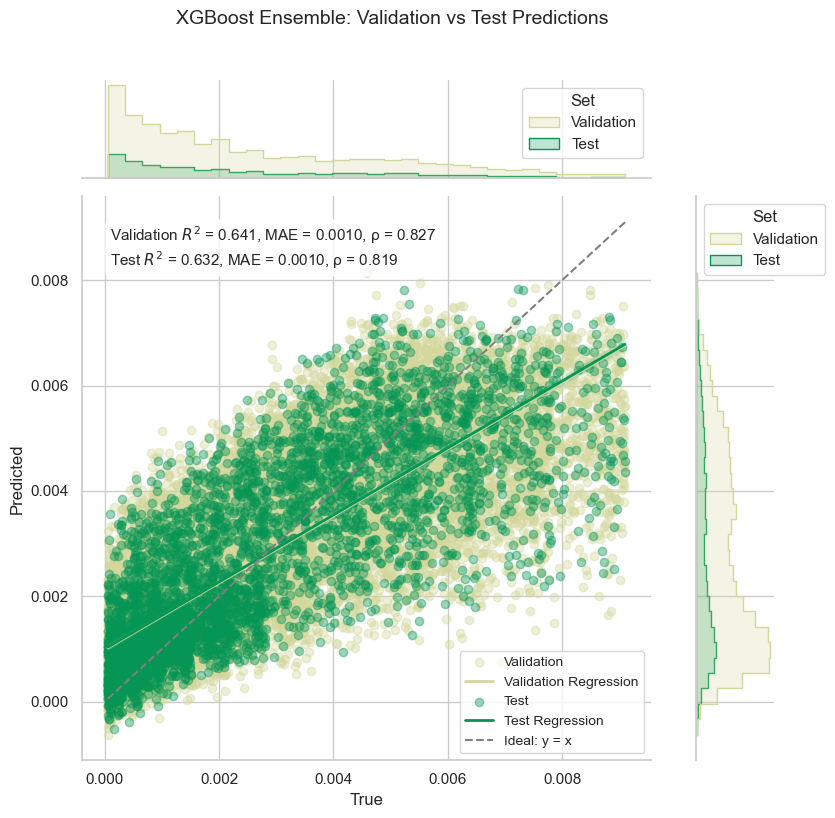

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr
from tqdm import tqdm
from xgboost import XGBRegressor

# 1Ô∏è‚É£ ËØªÂèñÊï∞ÊçÆ
df = pd.read_excel("GreenLoan_cleaned.xlsx")

# 2Ô∏è‚É£ Ê∏ÖÊ¥óÊï∞ÊçÆ
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# 3Ô∏è‚É£ ÁºñÁ†ÅÁ±ªÂà´ÂèòÈáè
categorical_cols = ["Industry", "province"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4Ô∏è‚É£ ÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = df.drop(columns=["Code", "Year", "Green credit default rate"])
y = df["Green credit default rate"]

# 5Ô∏è‚É£ Ê†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6Ô∏è‚É£ ÊãÜÂàÜËÆ≠ÁªÉÈõÜ/ÊµãËØïÈõÜ
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7Ô∏è‚É£ Â§öÊ¨°ËÆ≠ÁªÉÂπ∂ËÆ∞ÂΩïÁªìÊûú
n_repeats = 500
results = []
y_test_preds = []
y_val_preds = []  # ‚úÖ ‰øùÂ≠òÈ™åËØÅÈõÜÈ¢ÑÊµãÔºàÂê´Á¥¢ÂºïÔºâ

for i in tqdm(range(n_repeats), desc="Repeated Split (XGBoost)"):
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=i)

    model = XGBRegressor(random_state=i, verbosity=0)
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_val_preds.append((y_val.index, y_val_pred))  # ‚úÖ ‰øùÂ≠òÈ™åËØÅÈõÜÈ¢ÑÊµã

    y_test_pred = model.predict(X_test)
    y_test_preds.append(y_test_pred)

    def evaluate(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        spearman_corr, _ = spearmanr(y_true, y_pred)
        return r2, mse, rmse, mae, spearman_corr

    r2_val, mse_val, rmse_val, mae_val, spearman_val = evaluate(y_val, y_val_pred)
    r2_test, mse_test, rmse_test, mae_test, spearman_test = evaluate(y_test, y_test_pred)

    results.append({
        "run": i,
        "R2_val": r2_val,
        "MAE_val": mae_val,
        "RMSE_val": rmse_val,
        "Spearman_val": spearman_val,
        "R2_test": r2_test,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "Spearman_test": spearman_test
    })

# 8Ô∏è‚É£ Ê®°ÂûãÈõÜÊàêÈ¢ÑÊµãÔºàÊµãËØïÈõÜÔºâ
y_test_ensemble_pred = np.mean(y_test_preds, axis=0)

# 9Ô∏è‚É£ È™åËØÅÈõÜÈ¢ÑÊµãÂπ≥ÂùáÔºàÊåâÁ¥¢ÂºïÔºâ
val_pred_dict = {}
for idx, preds in y_val_preds:
    for i, row_id in enumerate(idx):
        if row_id not in val_pred_dict:
            val_pred_dict[row_id] = []
        val_pred_dict[row_id].append(preds[i])

val_avg_preds = {k: np.mean(v) for k, v in val_pred_dict.items()}

# ÁîüÊàêÈ™åËØÅÈõÜ DataFrame
df_val = pd.DataFrame({
    "True": y_trainval.loc[val_avg_preds.keys()],
    "Predicted": list(val_avg_preds.values()),
    "Set": "Validation"
})

# ÁîüÊàêÊµãËØïÈõÜ DataFrame
df_test = pd.DataFrame({
    "True": y_test,
    "Predicted": y_test_ensemble_pred,
    "Set": "Test"
})

# ÂêàÂπ∂È™åËØÅÈõÜÂíåÊµãËØïÈõÜ
df_plot = pd.concat([df_val, df_test], ignore_index=True)

# üîü ËÆ°ÁÆóÊåáÊ†á
r2_val = r2_score(df_val["True"], df_val["Predicted"])
r2_test = r2_score(df_test["True"], df_test["Predicted"])
mae_val = mean_absolute_error(df_val["True"], df_val["Predicted"])
mae_test = mean_absolute_error(df_test["True"], df_test["Predicted"])
spearman_val, _ = spearmanr(df_val["True"], df_val["Predicted"])
spearman_test, _ = spearmanr(df_test["True"], df_test["Predicted"])

# üìà ÂèØËßÜÂåñ
sns.set(style="whitegrid")
palette = {"Validation": "#D3D79B", "Test": "#059554"}

g = sns.JointGrid(data=df_plot, x="True", y="Predicted", height=8)

# Êï£ÁÇπÂõæ + ÂõûÂΩíÁ∫ø
for label, color in palette.items():
    subset = df_plot[df_plot["Set"] == label]
    g.ax_joint.scatter(subset["True"], subset["Predicted"], alpha=0.4, color=color, label=label)
    sns.regplot(data=subset, x="True", y="Predicted", ax=g.ax_joint,
                scatter=False, color=color, line_kws={"linewidth": 2}, label=f"{label} Regression")

# ÁêÜÊÉ≥Á∫ø y = x
min_val = df_plot["True"].min()
max_val = df_plot["True"].max()
g.ax_joint.plot([min_val, max_val], [min_val, max_val], '--', color='gray', label="Ideal: y = x")

# ËæπÁºòÁõ¥ÊñπÂõæ
sns.histplot(data=df_plot, x="True", hue="Set", ax=g.ax_marg_x,
             bins=30, element="step", common_norm=False, palette=palette)
sns.histplot(data=df_plot, y="Predicted", hue="Set", ax=g.ax_marg_y,
             bins=30, element="step", common_norm=False, palette=palette)

# Ê∑ªÂä†ÊñáÊú¨ËØ¥Êòé
g.ax_joint.text(
    0.05, 0.95,
    f"Validation $R^2$ = {r2_val:.3f}, MAE = {mae_val:.4f}, œÅ = {spearman_val:.3f}\n"
    f"Test $R^2$ = {r2_test:.3f}, MAE = {mae_test:.4f}, œÅ = {spearman_test:.3f}",
    transform=g.ax_joint.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Âõæ‰æã & Ê†áÈ¢ò
g.ax_joint.legend(loc="lower right", fontsize=10)
plt.suptitle("XGBoost Ensemble: Validation vs Test Predictions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [53]:
# ‚úÖ ÊâìÂç∞È™åËØÅÈõÜÊåáÊ†á
print("Validation Set Performance (500Ê¨°Âπ≥Âùá):")
print(f"R¬≤ ¬† ¬† ¬† ¬†: {r2_val:.6f}")
print(f"RMSE ¬† ¬† ¬†: {np.sqrt(mean_squared_error(df_val['True'], df_val['Predicted'])):.6f}")
print(f"MAE ¬† ¬† ¬† : {mae_val:.6f}")
print(f"Spearman ¬†: {spearman_val:.6f}")

# ‚úÖ ÊâìÂç∞ÊµãËØïÈõÜÊåáÊ†á
print("Test Set Performance (ÈõÜÊàêÈ¢ÑÊµã):")
print(f"R¬≤ ¬† ¬† ¬† ¬†: {r2_test:.6f}")
print(f"RMSE ¬† ¬† ¬†: {np.sqrt(mean_squared_error(df_test['True'], df_test['Predicted'])):.6f}")
print(f"MAE ¬† ¬† ¬† : {mae_test:.6f}")
print(f"Spearman ¬†: {spearman_test:.6f}")

Validation Set Performance (500Ê¨°Âπ≥Âùá):
R¬≤ ¬† ¬† ¬† ¬†: 0.640962
RMSE ¬† ¬† ¬†: 0.001362
MAE ¬† ¬† ¬† : 0.000999
Spearman ¬†: 0.826700
Test Set Performance (ÈõÜÊàêÈ¢ÑÊµã):
R¬≤ ¬† ¬† ¬† ¬†: 0.632183
RMSE ¬† ¬† ¬†: 0.001379
MAE ¬† ¬† ¬† : 0.001016
Spearman ¬†: 0.818768


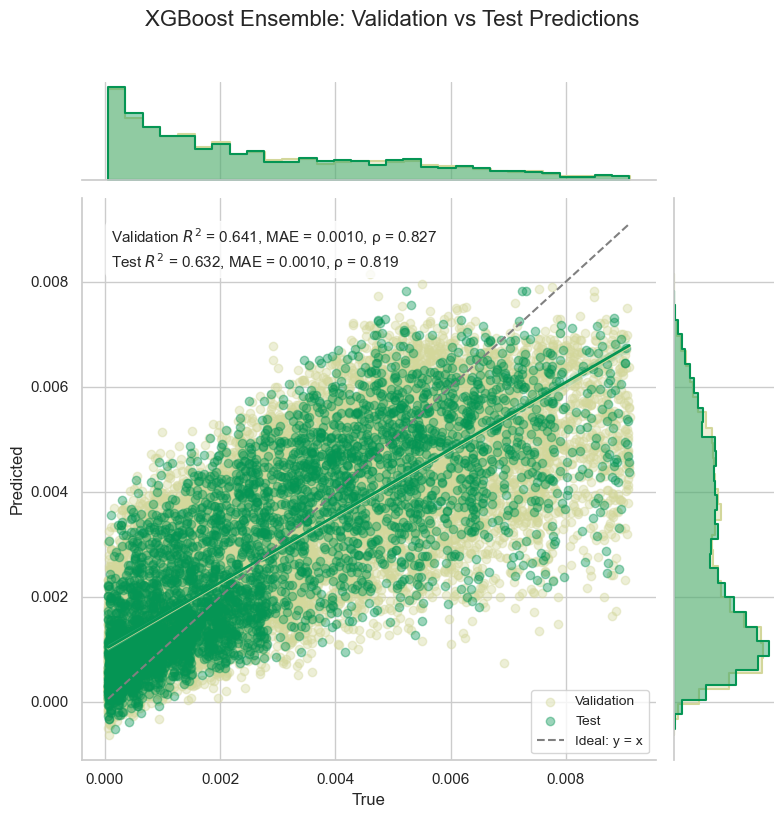

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
palette = {"Validation": "#D3D79B", "Test": "#059554"}

g = sns.JointGrid(data=df_plot, x="True", y="Predicted", height=8)

# Êï£ÁÇπÂõæ + ÂõûÂΩíÁ∫ø
for label, color in palette.items():
    subset = df_plot[df_plot["Set"] == label]
    g.ax_joint.scatter(subset["True"], subset["Predicted"], alpha=0.4, color=color, label=f"{label}")
    sns.regplot(data=subset, x="True", y="Predicted", ax=g.ax_joint,
                scatter=False, color=color, line_kws={"linewidth": 2})

# ÁêÜÊÉ≥Á∫ø y = x
min_val = df_plot["True"].min()
max_val = df_plot["True"].max()
g.ax_joint.plot([min_val, max_val], [min_val, max_val], '--', color='gray', label="Ideal: y = x")

# ‚úÖ ÂàÜÂºÄÁªòÂà∂ histogramÔºåÂπ∂ÂêÑËá™ÂΩí‰∏ÄÂåñ
for label, color in palette.items():
    subset = df_plot[df_plot["Set"] == label]
    sns.histplot(
        subset, x="True", ax=g.ax_marg_x,
        bins=30, stat="density", common_norm=False,
        color=color, alpha=0.4, fill=True,
        element="step", edgecolor=color, linewidth=1.5
    )
    sns.histplot(
        subset, y="Predicted", ax=g.ax_marg_y,
        bins=30, stat="density", common_norm=False,
        color=color, alpha=0.4, fill=True,
        element="step", edgecolor=color, linewidth=1.5
    )

# Ê∑ªÂä†ÊñáÊú¨ËØ¥Êòé
g.ax_joint.text(
    0.05, 0.95,
    f"Validation $R^2$ = {r2_val:.3f}, MAE = {mae_val:.4f}, œÅ = {spearman_val:.3f}\n"
    f"Test $R^2$ = {r2_test:.3f}, MAE = {mae_test:.4f}, œÅ = {spearman_test:.3f}",
    transform=g.ax_joint.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Âõæ‰æã & Ê†áÈ¢ò
g.ax_joint.legend(loc="lower right", fontsize=10)
plt.suptitle("XGBoost Ensemble: Validation vs Test Predictions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

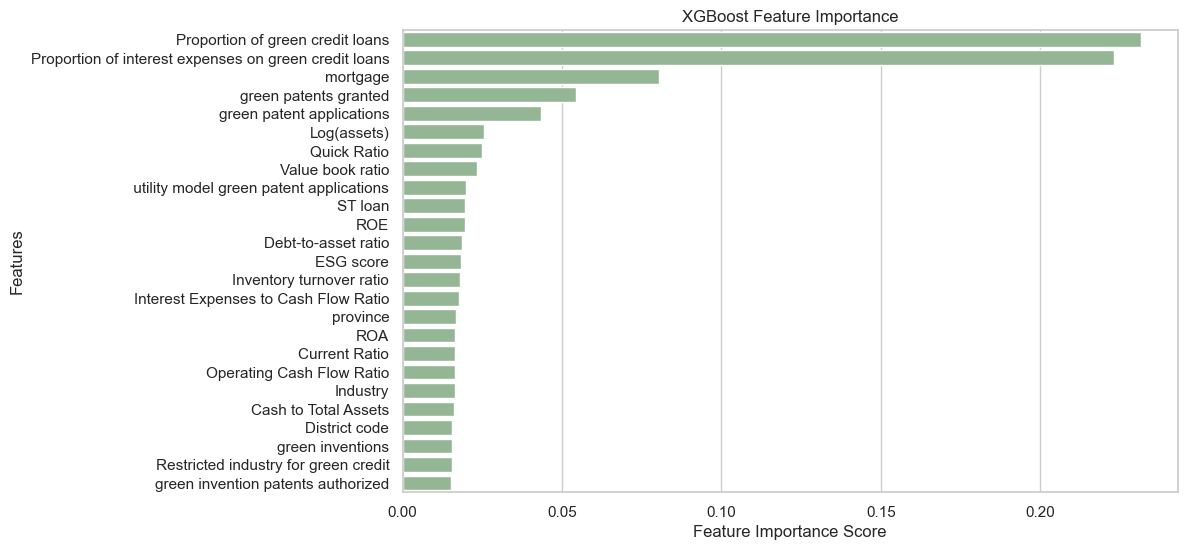

Top 10 Important Features:
                                              Feature  Importance
1                    Proportion of green credit loans    0.231433
2   Proportion of interest expenses on green credi...    0.223153
13                                           mortgage    0.080542
23                              green patents granted    0.054277
20                          green patent applications    0.043421
17                                        Log(assets)    0.025599
11                                        Quick Ratio    0.025063
15                                   Value book ratio    0.023342
22            utility model green patent applications    0.019828
14                                            ST loan    0.019610


In [76]:

# 8Ô∏è‚É£ ÊèêÂèñ & ÂèØËßÜÂåñÁâπÂæÅÈáçË¶ÅÊÄß
feature_importance = model.feature_importances_
feature_names = X.columns

# ËΩ¨Êç¢‰∏∫ DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# üìä ÂèØËßÜÂåñ
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, color="darkseagreen")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

# 9Ô∏è‚É£ ËæìÂá∫ÊúÄÈáçË¶ÅÁöÑÂâç 10 ‰∏™ÁâπÂæÅ
print("Top 10 Important Features:")
print(importance_df.head(10))

XGBoost Rank Regression: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [01:15<00:00,  3.97it/s]


Validation R¬≤: 0.5735, MAE: 0.001094, œÅ: 0.810
Test       R¬≤: 0.5579, MAE: 0.001118, œÅ: 0.802


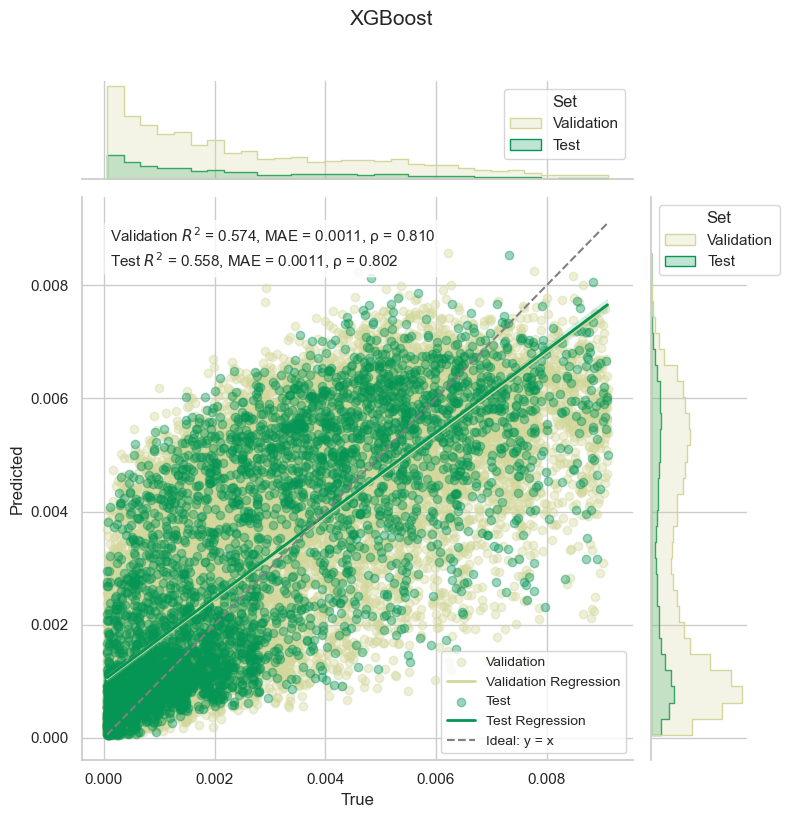

/var/folders/16/l2mzwqvx7c16z83x60ggh59r0000gn/T/ipykernel_98944/1020953047.py:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_plot.groupby(["Set", "Bin"]).apply(
/var/folders/16/l2mzwqvx7c16z83x60ggh59r0000gn/T/ipykernel_98944/1020953047.py:164: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_plot.groupby(["Set", "Bin"]).apply(


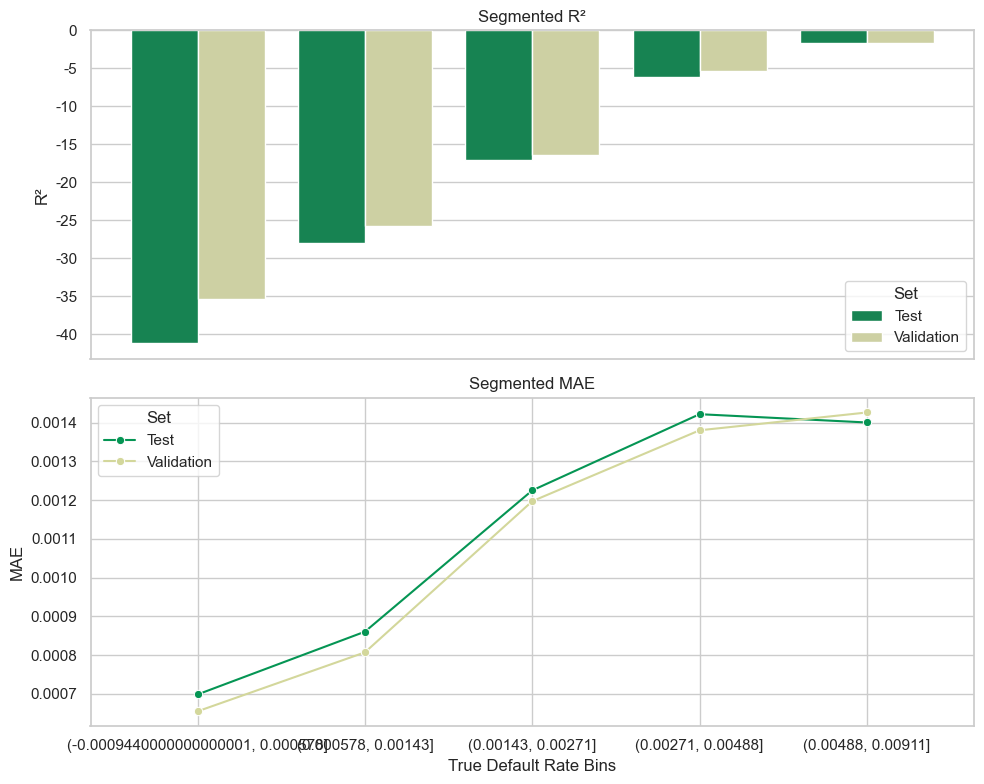

In [161]:
from sklearn.isotonic import IsotonicRegression

# üîπ 1. ËØªÂèñÊï∞ÊçÆ
df = pd.read_excel("GreenLoan_cleaned.xlsx")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# üîπ 2. ÁºñÁ†ÅÂàÜÁ±ªÂèòÈáè
for col in ["Industry", "province"]:
    df[col] = LabelEncoder().fit_transform(df[col])

# üîπ 3. ÁâπÂæÅ‰∏éÁõÆÊ†á
X = df.drop(columns=["Code", "Year", "Green credit default rate"])
y = df["Green credit default rate"]

# üîπ 4. ÊéíÂ∫èÁõÆÊ†á‰Ωú‰∏∫ÂõûÂΩíÁõÆÊ†á
qt = QuantileTransformer(output_distribution='uniform', random_state=42)
y_rank = qt.fit_transform(y.values.reshape(-1, 1)).flatten()

# üîπ 5. Ê†áÂáÜÂåñÁâπÂæÅ
X_scaled = StandardScaler().fit_transform(X)

# üîπ 6. ÊãÜÂàÜÊï∞ÊçÆ
X_trainval, X_test, y_trainval_rank, y_test_rank, y_trainval_raw, y_test_raw = train_test_split(
    X_scaled, y_rank, y, test_size=0.2, random_state=42
)

# üîπ 7. Â§öËΩÆËÆ≠ÁªÉ
n_repeats = 300
val_scores = []
y_val_preds = []
y_test_preds = []

for i in tqdm(range(n_repeats), desc="XGBoost Rank Regression"):
    X_train, X_val, y_train_rank, y_val_rank, y_train_raw, y_val_raw = train_test_split(
        X_trainval, y_trainval_rank, y_trainval_raw, test_size=0.25, random_state=i
    )

    weights = np.where(y_train_raw > 0.006, 10.0, 1.0)

    model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=i,
        verbosity=0
    )
    model.fit(X_train, y_train_rank, sample_weight=weights)

    # È¢ÑÊµã rank
    y_val_pred_rank = model.predict(X_val)
    y_test_pred_rank = model.predict(X_test)

    # ‰ΩøÁî®Êõ¥Âπ≥Êªë„ÄÅÊõ¥Á®≥ÂÅ•ÁöÑÊò†Â∞ÑÂô®ÔºöIsotonicRegression
    iso_reg = IsotonicRegression(
        y_min=y_train_raw.min(),
        y_max=y_train_raw.max(),
        increasing=True,
        out_of_bounds="clip"  # Èò≤Ê≠¢È¢ÑÊµãÁöÑ rank Ë∂ÖÂá∫ËÆ≠ÁªÉËåÉÂõ¥Êó∂Êä•Èîô
    )
    iso_reg.fit(y_train_rank, y_train_raw)

    # Â∫îÁî® rank ‚Üí y ÂçïË∞ÉÊò†Â∞Ñ
    y_val_pred = iso_reg.predict(y_val_pred_rank)
    y_test_pred = iso_reg.predict(y_test_pred_rank)

    # ‰øùÂ≠òÈ™åËØÅÈõÜÂéüÂßãÁ¥¢Âºï
    original_val_indices = y_val_raw.index
    y_val_preds.append((original_val_indices, y_val_pred))
    y_test_preds.append(y_test_pred)

    # È™åËØÅÈõÜ R¬≤ÔºàÂéüÂßã yÔºâ
    r2_val = r2_score(y_val_raw, y_val_pred)
    val_scores.append(max(0, r2_val))

# üîπ 8. Top-K ÈõÜÊàê
top_k = 100
top_indices = np.argsort(val_scores)[-top_k:]
top_weights = np.array(val_scores)[top_indices]
top_weights = top_weights / np.sum(top_weights)

# TEST ÈõÜÊàêÈ¢ÑÊµã
top_test_preds = [y_test_preds[i] for i in top_indices]
y_test_ensemble_pred = np.average(top_test_preds, axis=0, weights=top_weights)

# VALIDATION ÈõÜÊàê
val_pred_dict = {}
for i in top_indices:
    idx, preds = y_val_preds[i]
    for j, row_id in enumerate(idx):
        if row_id not in val_pred_dict:
            val_pred_dict[row_id] = []
        val_pred_dict[row_id].append((preds[j], val_scores[i]))

val_avg_preds = {
    k: np.average([v for v, w in v_list], weights=[w for v, w in v_list])
    for k, v_list in val_pred_dict.items()
}

# üîπ 9. ÊûÑÂª∫ÁªìÊûú DataFrame
df_val = pd.DataFrame({
    "True": y_trainval_raw.loc[val_avg_preds.keys()],
    "Predicted": list(val_avg_preds.values()),
    "Set": "Validation"
})

df_test = pd.DataFrame({
    "True": y_test_raw,
    "Predicted": y_test_ensemble_pred,
    "Set": "Test"
})

df_plot = pd.concat([df_val, df_test], ignore_index=True)

# üîπ 10. ÊåáÊ†áËÆ°ÁÆó
r2_val = r2_score(df_val["True"], df_val["Predicted"])
r2_test = r2_score(df_test["True"], df_test["Predicted"])
mae_val = mean_absolute_error(df_val["True"], df_val["Predicted"])
mae_test = mean_absolute_error(df_test["True"], df_test["Predicted"])
rho_val, _ = spearmanr(df_val["True"], df_val["Predicted"])
rho_test, _ = spearmanr(df_test["True"], df_test["Predicted"])

print(f"Validation R¬≤: {r2_val:.4f}, MAE: {mae_val:.6f}, œÅ: {rho_val:.3f}")
print(f"Test       R¬≤: {r2_test:.4f}, MAE: {mae_test:.6f}, œÅ: {rho_test:.3f}")

# üîπ 11. Êï£ÁÇπÂõæÂèØËßÜÂåñ
sns.set(style="whitegrid")
palette = {"Validation": "#D3D79B", "Test": "#059554"}
g = sns.JointGrid(data=df_plot, x="True", y="Predicted", height=8)

for label, color in palette.items():
    subset = df_plot[df_plot["Set"] == label]
    g.ax_joint.scatter(subset["True"], subset["Predicted"], alpha=0.4, color=color, label=label)
    sns.regplot(data=subset, x="True", y="Predicted", ax=g.ax_joint, scatter=False, color=color,
                line_kws={"linewidth": 2}, label=f"{label} Regression")

# ÁêÜÊÉ≥Á∫ø
min_val, max_val = df_plot["True"].min(), df_plot["True"].max()
g.ax_joint.plot([min_val, max_val], [min_val, max_val], '--', color='gray', label="Ideal: y = x")

# ËæπÁºòÂàÜÂ∏É
sns.histplot(data=df_plot, x="True", hue="Set", ax=g.ax_marg_x, bins=30, element="step", common_norm=False, palette=palette)
sns.histplot(data=df_plot, y="Predicted", hue="Set", ax=g.ax_marg_y, bins=30, element="step", common_norm=False, palette=palette)

# ÊåáÊ†áÊñáÂ≠ó
g.ax_joint.text(
    0.05, 0.95,
    f"Validation $R^2$ = {r2_val:.3f}, MAE = {mae_val:.4f}, œÅ = {rho_val:.3f}\n"
    f"Test $R^2$ = {r2_test:.3f}, MAE = {mae_test:.4f}, œÅ = {rho_test:.3f}",
    transform=g.ax_joint.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)
g.ax_joint.legend(loc="lower right", fontsize=10)
plt.suptitle("XGBoost", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

# üîπ 12. ÂàÜÊÆµ R¬≤ Âíå MAE Âõæ
df_plot["Bin"] = pd.qcut(df_plot["True"], q=5, duplicates='drop')
grouped = df_plot.groupby(["Set", "Bin"]).apply(
    lambda g: pd.Series({
        "R2": r2_score(g["True"], g["Predicted"]),
        "MAE": mean_absolute_error(g["True"], g["Predicted"]),
        "Count": len(g)
    })
).reset_index()
grouped["BinLabel"] = grouped["Bin"].astype(str)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.barplot(data=grouped, x="BinLabel", y="R2", hue="Set", palette=palette, ax=axs[0])
axs[0].set_title("Segmented R¬≤")
axs[0].set_ylabel("R¬≤")
axs[0].legend(title="Set")

sns.lineplot(data=grouped, x="BinLabel", y="MAE", hue="Set", marker="o", palette=palette, ax=axs[1])
axs[1].set_title("Segmented MAE")
axs[1].set_ylabel("MAE")
axs[1].set_xlabel("True Default Rate Bins")
axs[1].legend(title="Set")

plt.tight_layout()
plt.show()